In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
# Import dependencies for Preprocessing Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Import the new cleaned CSV file 
file = Path('Cleaned_WineQualityData.csv')
# Read the CSV into a pandas DF
df = pd.read_csv(file)
# Preview of the DataFrame
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,1.0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,2.0


In [3]:
#  Rename TARGET column to BoxesSold
df.rename(columns={'TARGET': 'BoxesSold'}, inplace= True)
df.head()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,1.0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,2.0


In [4]:
#  Visualize correlation values
df.corr()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
BoxesSold,1.000000,-0.012538,-0.075998,0.002345,0.003520,-0.030430,0.022640,0.021602,-0.047599,0.000220,-0.021220,0.073777,0.497946,-0.167643,0.554686
FixedAcidity,-0.012538,1.000000,0.019011,0.014000,-0.015429,-0.006104,0.015438,-0.023323,0.011574,-0.004554,0.042229,-0.013085,0.011376,0.154168,-0.004937
VolatileAcidity,-0.075998,0.019011,1.000000,-0.023432,0.001528,0.014849,-0.011441,-0.000743,0.013098,0.007203,0.001516,0.000260,-0.020242,0.025053,-0.040243
CitricAcid,0.002345,0.014000,-0.023432,1.000000,-0.009843,-0.033561,0.012113,-0.009917,-0.016992,-0.000758,-0.014424,0.016986,0.015332,0.054584,0.007140
ResidualSugar,0.003520,-0.015429,0.001528,-0.009843,1.000000,0.004122,0.021959,0.017031,-0.007121,0.017564,-0.002706,-0.018943,-0.004579,-0.020302,0.019666
Chlorides,-0.030430,-0.006104,0.014849,-0.033561,0.004122,1.000000,-0.020492,0.000419,0.020672,-0.017970,0.002619,-0.022885,-0.006387,-0.001713,-0.006324
FreeSulfurDioxide,0.022640,0.015438,-0.011441,0.012113,0.021959,-0.020492,1.000000,0.013462,-0.008664,-0.002009,0.026829,-0.023867,0.014960,-0.014734,-0.015390
TotalSulfurDioxide,0.021602,-0.023323,-0.000743,-0.009917,0.017031,0.000419,0.013462,1.000000,0.023168,-0.003423,0.002504,-0.016852,-0.002724,-0.022129,0.022095
Density,-0.047599,0.011574,0.013098,-0.016992,-0.007121,0.020672,-0.008664,0.023168,1.000000,-0.002019,-0.010609,-0.006128,-0.018094,0.047779,-0.028492
pH,0.000220,-0.004554,0.007203,-0.000758,0.017564,-0.017970,-0.002009,-0.003423,-0.002019,1.000000,0.010449,-0.012203,0.000218,-0.053713,-0.004400


In [5]:
# Cast STARS values to integers -1. 
# Results in STARS values 0-3
df['STARS'] = df['STARS'].astype('int')-1
df.head()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,2
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,3
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,1


In [6]:
# Number of STARS in each category (0-3)
df['STARS'].value_counts()

STARS
1    2450
0    2065
2    1527
3     394
Name: count, dtype: int64

In [7]:
#  Manual class balancing
df0 = df[df['STARS'] == 0].sample(1500, random_state=1, replace=True)
df1 = df[df['STARS'] == 1].sample(1500, random_state=1, replace=True)
df2 = df[df['STARS'] == 2].sample(1500, random_state=1, replace=True)
df3 = df[df['STARS'] == 3].sample(1500, random_state=1, replace=True)

# Combine four DFs to one resulting in 6000 rows of data
df_all = pd.concat([df0,df1,df2,df3], axis=0)

df_all

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
3249,4,6.9,0.24,0.34,4.7,0.040,43.0,161.0,0.95853,3.36,0.38,10.60,0,7,0
735,3,0.9,0.15,0.25,4.8,0.029,72.0,-7.0,0.95323,3.17,1.74,12.20,-2,7,0
3382,5,8.7,0.33,-1.05,1.2,0.016,39.0,150.0,0.96847,3.33,0.62,14.00,-1,6,0
2820,4,-0.1,0.27,0.37,-50.3,0.503,27.0,327.0,0.99174,3.13,1.16,12.70,1,8,0
2968,4,12.6,0.44,0.49,2.4,0.386,26.0,121.0,1.01441,3.23,1.95,18.40,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,5,6.4,1.18,0.31,44.8,0.071,41.0,114.0,0.96760,3.37,0.80,6.50,0,7,3
5482,5,2.0,0.63,0.33,6.7,0.037,32.0,155.0,1.01364,4.47,-0.48,15.50,0,8,3
448,4,8.1,1.30,0.22,6.4,0.056,44.0,272.0,0.96467,3.13,1.01,10.10,0,8,3
2120,6,10.7,-0.88,0.41,-30.4,0.093,30.0,134.0,0.96433,2.92,0.42,10.40,1,7,3


In [41]:
# X variable is all features except target (STARS)
X = df_all[['ResidualSugar', 'pH', 'Alcohol', 'LabelAppeal']]

# Y variable is target 
y = df_all[['STARS']]

In [43]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [44]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=3000, max_depth=14, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

c:\Users\Lori Bissell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=14, n_estimators=3000, random_state=42)

In [51]:
#  Training model
train_preds = rf_model.predict(X_train_scaled)

from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_train, train_preds)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_train, train_preds)
# print(cm)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1125
           1       0.96      0.94      0.95      1125
           2       0.96      0.92      0.94      1125
           3       0.94      0.98      0.96      1125

    accuracy                           0.95      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.95      0.95      0.95      4500



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

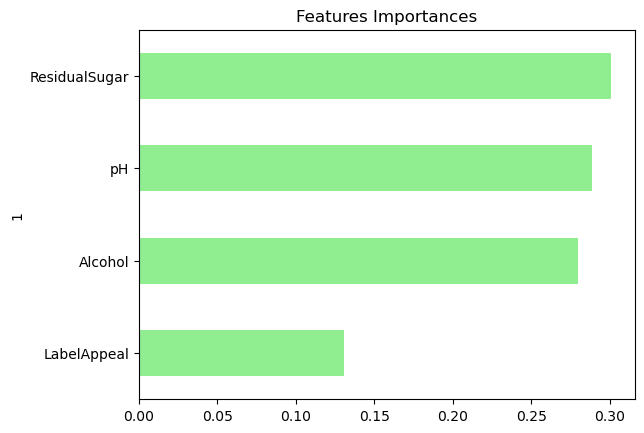

In [52]:
# rf_model.feature_importances_
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [53]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([3, 0, 1, ..., 3, 1, 1])

In [54]:
# From Lesson 20.2.05
#  Test model
from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_test, predictions)
print(cm)
print(cr)

[[249  62  35  29]
 [ 87 193  58  37]
 [ 52  61 228  34]
 [  2  13   6 354]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       375
           1       0.59      0.51      0.55       375
           2       0.70      0.61      0.65       375
           3       0.78      0.94      0.85       375

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500

